In [7]:
import numpy as np
import pandas as pd
from astropy.io import ascii
from astropy.coordinates import SkyCoord
from astropy import units as u
import os
import matplotlib.pyplot as plt
import mpl_scatter_density
from sklearn.mixture import GaussianMixture

# Comparing catalogue (vG+2023)

In [8]:
df_vg =  pd.read_csv('Catalogues/NGC5822_vG2023.csv')
df_vg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
0,NGC_5822,5881692149823656320,224.731239,-54.566271,1.1099,-7.637,-5.249,14.223904,14.590719,13.684692,1.00
1,NGC_5822,5881693146252823040,225.029198,-54.642280,1.2323,-7.615,-5.588,13.173482,13.473589,12.706505,1.00
2,NGC_5822,5881693008813852032,225.093020,-54.639486,1.1770,-7.513,-5.336,17.276005,18.127857,16.374056,1.00
3,NGC_5822,5881621849790430720,225.256861,-54.944673,1.2361,-7.625,-4.914,10.945331,11.127864,10.621691,1.00
4,NGC_5822,5881581129144018944,224.939856,-55.470265,1.1691,-7.361,-6.179,17.633880,18.448076,16.705523,0.17
...,...,...,...,...,...,...,...,...,...,...,...
3806,NGC_5822,5887682941959525632,225.462268,-54.661084,1.2073,-7.094,-4.968,19.999956,20.675339,18.942724,0.11
3807,NGC_5822,5887513479716081408,228.244040,-54.481390,1.2680,-7.562,-4.841,19.671330,20.907232,18.590193,0.07
3808,NGC_5822,5887644802678111616,225.789618,-54.490146,1.2263,-7.360,-5.264,14.942392,15.364985,14.344611,1.00
3809,NGC_5822,5887409644592719744,226.436096,-55.149314,0.8496,-7.272,-5.059,19.407978,20.748910,18.374445,0.12


In [9]:
jj, = np.where(df_vg.Pmemb >= 0.7)
dfvg = df_vg.iloc[jj]

In [10]:
dfvg

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
0,NGC_5822,5881692149823656320,224.731239,-54.566271,1.1099,-7.637,-5.249,14.223904,14.590719,13.684692,1.00
1,NGC_5822,5881693146252823040,225.029198,-54.642280,1.2323,-7.615,-5.588,13.173482,13.473589,12.706505,1.00
2,NGC_5822,5881693008813852032,225.093020,-54.639486,1.1770,-7.513,-5.336,17.276005,18.127857,16.374056,1.00
3,NGC_5822,5881621849790430720,225.256861,-54.944673,1.2361,-7.625,-4.914,10.945331,11.127864,10.621691,1.00
9,NGC_5822,5881663734314222848,224.529052,-54.907023,1.2427,-8.045,-5.691,15.783429,16.332071,15.084052,0.94
...,...,...,...,...,...,...,...,...,...,...,...
3788,NGC_5822,5887644076778836992,225.766634,-54.552180,1.2115,-7.631,-5.502,17.686186,18.633373,16.712296,0.98
3790,NGC_5822,5887682907633247232,225.485704,-54.661399,1.2133,-7.699,-5.579,13.759797,14.118023,13.219545,1.00
3792,NGC_5822,5887644802678106752,225.802585,-54.496725,1.0860,-7.484,-5.220,16.826729,17.568169,15.986682,1.00
3808,NGC_5822,5887644802678111616,225.789618,-54.490146,1.2263,-7.360,-5.264,14.942392,15.364985,14.344611,1.00


# 5 Populations

In [11]:
p1_5p = pd.read_csv('Catalogues/pop1_NGC5822_GMM1_5populations.csv')
p2_5p = pd.read_csv('Catalogues/pop2_NGC5822_GMM1_5populations.csv')
p3_5p = pd.read_csv('Catalogues/pop3_NGC5822_GMM1_5populations.csv')
p4_5p = pd.read_csv('Catalogues/pop4_NGC5822_GMM1_5populations.csv')
p5_5p = pd.read_csv('Catalogues/pop5_NGC5822_GMM1_5populations.csv')

## Computing Completeness and Purity

### Population 1

In [12]:
ra1 = p1_5p.RA_ICRS
dec1 = p1_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [13]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [14]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [15]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [16]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [17]:
p1_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
490,224.961476,-55.213635,5881594602515882240,1.2689,-7.512,-5.034,31,1.361,NaN,1.162,17.349474,18.231016,16.355848,1.875168,NaN,-36.381012,224.961534,-55.213613,1.298703,0
562,225.550345,-54.816987,5881629301493616512,1.1493,-7.640,-6.049,31,1.340,NaN,1.158,17.376156,18.338808,16.360926,1.977882,NaN,-35.891907,225.550404,-54.816960,1.180023,0
563,225.568329,-54.811087,5881629340213941504,1.2995,-7.675,-5.432,31,1.378,NaN,1.018,17.205750,18.029667,16.288551,1.741116,NaN,-35.882804,225.568389,-54.811063,1.329280,0
664,224.574076,-54.990330,5881658168036516864,1.1791,-7.985,-5.555,31,1.403,NaN,1.095,16.926466,17.626638,16.007635,1.619003,NaN,-36.249552,224.574138,-54.990306,1.209249,0
681,224.517610,-54.909506,5881663734314222592,1.2572,-7.735,-5.469,31,1.399,NaN,0.995,17.059288,17.767277,16.132990,1.634287,NaN,-36.185276,224.517670,-54.909482,1.287015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,225.411109,-53.996472,5899727056734045056,1.3037,-7.802,-5.409,31,1.370,NaN,1.007,17.514515,18.410551,16.575540,1.835011,NaN,-35.148840,225.411168,-53.996448,1.332758,0
3237,225.422426,-53.983871,5899727095425562624,1.2477,-7.714,-5.433,31,1.362,NaN,1.048,17.478111,18.408281,16.568153,1.840128,NaN,-35.134725,225.422485,-53.983847,1.277155,0
3243,225.140834,-54.001086,5899728950851484416,1.2710,-7.554,-5.575,31,1.369,NaN,1.009,17.246780,18.115307,16.344120,1.771187,NaN,-35.207581,225.140891,-54.001061,1.300963,0
3255,225.269970,-53.823054,5899732696063155968,1.2662,-7.634,-5.464,31,1.413,NaN,1.018,16.659767,17.361372,15.844638,1.516734,NaN,-35.014263,225.270028,-53.823030,1.297141,0


In [18]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
1017,NGC_5822,5881594602515882240,224.961476,-55.213635,1.2689,-7.512,-5.034,17.349474,18.231016,16.355848,0.81
1236,NGC_5822,5881629301493616512,225.550345,-54.816987,1.1493,-7.640,-6.049,17.376156,18.338808,16.360926,0.87
1227,NGC_5822,5881629340213941504,225.568329,-54.811087,1.2995,-7.675,-5.432,17.205750,18.029667,16.288551,1.00
416,NGC_5822,5881658168036516864,224.574076,-54.990330,1.1791,-7.985,-5.555,16.926466,17.626638,16.007635,0.92
10,NGC_5822,5881663734314222592,224.517610,-54.909506,1.2572,-7.735,-5.469,17.059288,17.767277,16.132990,0.99
...,...,...,...,...,...,...,...,...,...,...,...
475,NGC_5822,5899727056734045056,225.411109,-53.996472,1.3037,-7.802,-5.409,17.514515,18.410551,16.575540,0.91
484,NGC_5822,5899727095425562624,225.422426,-53.983871,1.2477,-7.714,-5.433,17.478111,18.408281,16.568153,1.00
187,NGC_5822,5899728950851484416,225.140834,-54.001086,1.2710,-7.554,-5.575,17.246780,18.115307,16.344120,1.00
504,NGC_5822,5899732696063155968,225.269970,-53.823054,1.2662,-7.634,-5.464,16.659767,17.361372,15.844638,1.00


Text(0, 0.5, 'DEC (deg)')

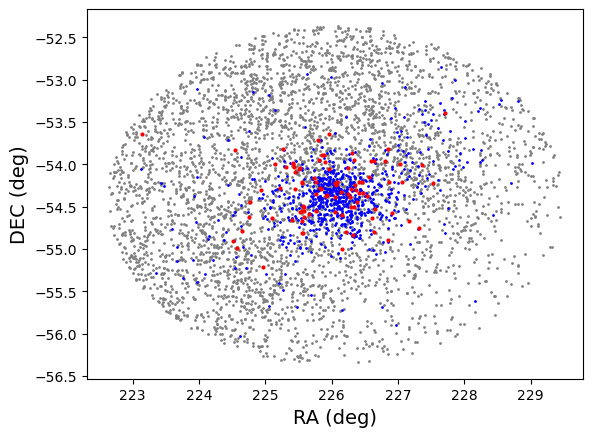

In [19]:
fig, ax = plt.subplots()

ax.scatter(p1_5p.RA_ICRS, p1_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_5p.iloc[matched_idx_catalog1].RA_ICRS, p1_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-11.5,-14.2)
#ax.set_xlim(121.2,124.5)

In [20]:
dfvg_t = len(dfvg)
p1_5p_t = len(p1_5p.iloc[matched_idx_catalog1])

Completeness


In [21]:
p1_5p_c = p1_5p_t /dfvg_t
p1_5p_c*100

10.941176470588236

Pureness

In [22]:
p1_5p_p = p1_5p_t/len(p1_5p)
p1_5p_p*100

2.2578295702840494

### Population 2

In [23]:
ra1 = p2_5p.RA_ICRS
dec1 = p2_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [24]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [25]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [26]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [27]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [28]:
p2_5p

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,226.461484,-56.340163,5880539174378845568,1.1586,-8.144,-5.034,95,NaN,1.3523,1.021,19.798546,21.077251,18.408400,2.668852,NaN,-37.145181,226.461549,-56.340141,1.148181,1
1,226.444467,-56.302930,5880539827213942656,1.1082,-6.309,-5.284,95,NaN,1.2832,1.106,18.936375,20.266830,17.767336,2.499495,NaN,-37.113460,226.444518,-56.302906,1.135459,1
2,226.499861,-56.285553,5880539930294491392,1.1275,-6.309,-4.976,95,NaN,1.4025,1.041,20.484121,21.451445,19.451214,2.000231,NaN,-37.086582,226.499912,-56.285531,1.122525,1
3,227.105171,-56.203001,5880555078636879488,1.1449,-6.066,-5.452,95,NaN,1.3274,0.982,19.230587,20.561922,18.236923,2.324999,NaN,-36.894318,227.105219,-56.202977,1.157101,1
4,227.293872,-56.144272,5880556418662182528,1.1429,-9.288,-5.094,95,NaN,1.3657,0.975,17.841288,18.841225,16.904420,1.936804,NaN,-36.803562,227.293946,-56.144249,1.174316,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3599,226.646091,-52.413321,5900299528629020928,1.1022,-8.484,-5.022,95,NaN,1.4792,1.097,19.861063,20.656954,18.865852,1.791101,NaN,-33.409555,226.646153,-52.413298,1.110917,1
3600,226.576443,-52.412286,5900299700459850752,1.1315,-6.303,-6.445,95,NaN,1.4520,1.098,19.292915,20.099834,18.312653,1.787182,NaN,-33.422484,226.576489,-52.412257,1.144896,1
3601,226.521113,-52.405518,5900301246616067072,1.1750,-8.848,-6.819,95,NaN,1.2681,1.041,19.696411,20.798323,18.988674,1.809648,NaN,-33.427153,226.521177,-52.405487,1.158159,1
3602,226.481729,-52.397981,5900301384055078016,1.1456,-8.188,-4.648,95,NaN,1.4378,0.973,19.800613,NaN,NaN,NaN,NaN,-33.427917,226.481789,-52.397960,1.149067,1


In [29]:
p2_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
366,223.760676,-55.344328,5881551377958880128,1.1152,-7.487,-5.748,31,1.437,NaN,1.032,16.466734,17.092070,15.677525,1.414545,NaN,-36.745401,223.760734,-55.344302,1.146472,1
388,225.060793,-55.680014,5881564091066262016,1.1093,-7.255,-5.000,31,1.432,NaN,0.996,16.137136,16.785877,15.373423,1.412455,NaN,-36.798122,225.060850,-55.679992,1.141437,1
414,225.270825,-55.485664,5881572848446940544,1.0986,-7.798,-5.539,31,1.357,NaN,1.092,17.944447,18.905075,16.980621,1.924454,NaN,-36.574527,225.270886,-55.485639,1.125751,1
534,225.516483,-54.972678,5881623735215581440,1.1047,-7.405,-5.551,95,NaN,1.3206,1.050,17.753492,18.541800,16.619453,1.922346,NaN,-36.044785,225.516540,-54.972653,1.143086,1
1197,226.994399,-54.557440,5887465238679318272,1.1098,-7.448,-5.701,31,1.319,NaN,0.953,18.369164,19.492678,17.354685,2.137993,NaN,-35.365304,226.994456,-54.557415,1.135509,1
1254,227.687838,-54.703526,5887492687767321216,1.1385,-7.065,-5.471,31,1.311,NaN,1.010,18.362644,19.490253,17.277908,2.212345,NaN,-35.370499,227.687892,-54.703502,1.164515,1
1379,227.086107,-54.363846,5887561445929174144,1.0945,-7.290,-5.671,31,1.341,NaN,1.010,18.055210,18.950380,16.965130,1.985251,NaN,-35.164994,227.086162,-54.363821,1.121503,1
1382,226.973779,-54.384177,5887564022934878464,1.1068,-7.859,-5.188,31,1.452,NaN,1.006,16.113703,16.690302,15.378590,1.311712,NaN,-35.205878,226.973839,-54.384154,1.139234,1
1409,227.309448,-54.126391,5887574777533795712,1.1054,-7.004,-5.325,31,1.370,NaN,1.056,17.195107,18.072567,16.273400,1.799168,NaN,-34.897771,227.309501,-54.126367,1.135524,1
1540,226.168965,-54.624885,5887628756679396736,1.1160,-7.645,-5.178,95,NaN,1.4134,1.051,16.808088,17.512194,15.804749,1.707444,NaN,-35.589400,226.169024,-54.624862,1.146914,1


In [30]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
1510,NGC_5822,5881551377958880128,223.760676,-55.344328,1.1152,-7.487,-5.748,16.466734,17.092070,15.677525,0.96
558,NGC_5822,5881564091066262016,225.060793,-55.680014,1.1093,-7.255,-5.000,16.137136,16.785877,15.373423,0.79
438,NGC_5822,5881572848446940544,225.270825,-55.485664,1.0986,-7.798,-5.539,17.944447,18.905075,16.980621,0.71
76,NGC_5822,5881623735215581440,225.516483,-54.972678,1.1047,-7.405,-5.551,17.753492,18.541800,16.619453,0.92
3271,NGC_5822,5887465238679318272,226.994399,-54.557440,1.1098,-7.448,-5.701,18.369164,19.492678,17.354685,0.83
1434,NGC_5822,5887492687767321216,227.687838,-54.703526,1.1385,-7.065,-5.471,18.362644,19.490253,17.277908,0.73
2358,NGC_5822,5887561445929174144,227.086107,-54.363846,1.0945,-7.290,-5.671,18.055210,18.950380,16.965130,0.83
2339,NGC_5822,5887564022934878464,226.973779,-54.384177,1.1068,-7.859,-5.188,16.113703,16.690302,15.378590,0.99
1887,NGC_5822,5887574777533795712,227.309448,-54.126391,1.1054,-7.004,-5.325,17.195107,18.072567,16.273400,0.79
1728,NGC_5822,5887628756679396736,226.168965,-54.624885,1.1160,-7.645,-5.178,16.808088,17.512194,15.804749,0.95


Text(0, 0.5, 'DEC (deg)')

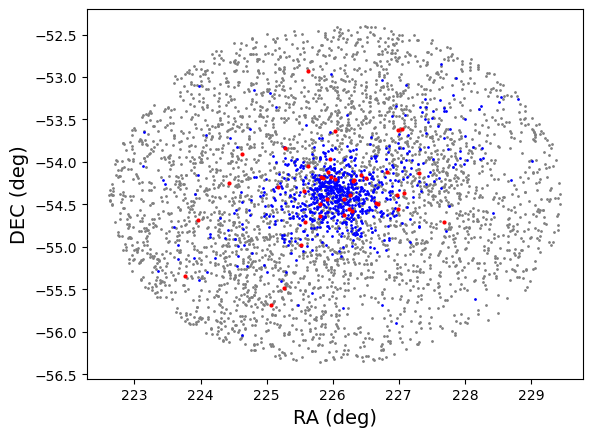

In [31]:
fig, ax = plt.subplots()

ax.scatter(p2_5p.RA_ICRS, p2_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_5p.iloc[matched_idx_catalog1].RA_ICRS, p2_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-11.5,-14.2)
#ax.set_xlim(121.2,124.5)

In [32]:
dfvg_t = len(dfvg)
p2_5p_t = len(p2_5p.iloc[matched_idx_catalog1])

Completeness


In [33]:
p2_5p_c = p2_5p_t /dfvg_t
p2_5p_c*100

4.941176470588235

Pureness

In [34]:
p2_5p_p = p2_5p_t/len(p2_5p)
p2_5p_p*100

1.1653718091009988

### Population 3

In [35]:
ra1 = p3_5p.RA_ICRS
dec1 = p3_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [36]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [37]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [38]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [39]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [40]:
p3_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
781,227.824025,-54.055434,5887584363901458816,1.3043,-7.391,-5.688,31,1.366,NaN,0.977,17.366590,18.257948,16.458431,1.799517,NaN,-34.732052,227.824081,-54.055409,1.334016,2
1052,227.316862,-53.352571,5887818181913082368,1.1910,-7.355,-5.490,31,1.411,NaN,0.977,16.765852,17.465560,15.929163,1.536398,NaN,-34.165156,227.316917,-53.352547,1.221729,2
1113,228.696431,-54.217853,5887895113373279360,1.2451,-7.077,-5.860,31,1.382,NaN,1.023,16.710571,17.538715,15.821643,1.717073,NaN,-34.721127,228.696484,-54.217827,1.276413,2
1731,228.002407,-53.692166,5887981974795794048,1.2053,-6.980,-5.525,31,1.430,NaN,1.019,16.540514,17.186708,15.748414,1.438294,NaN,-34.354299,228.002459,-53.692141,1.236588,2


In [41]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
1375,NGC_5822,5887584363901458816,227.824025,-54.055434,1.3043,-7.391,-5.688,17.366590,18.257948,16.458431,0.93
289,NGC_5822,5887818181913082368,227.316862,-53.352571,1.1910,-7.355,-5.490,16.765852,17.465560,15.929163,1.00
702,NGC_5822,5887895113373279360,228.696431,-54.217853,1.2451,-7.077,-5.860,16.710571,17.538715,15.821643,0.80
1265,NGC_5822,5887981974795794048,228.002407,-53.692166,1.2053,-6.980,-5.525,16.540514,17.186708,15.748414,0.93


Text(0, 0.5, 'DEC (deg)')

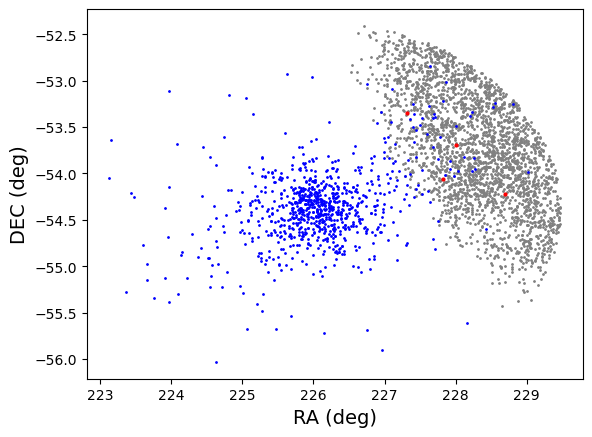

In [42]:
fig, ax = plt.subplots()

ax.scatter(p3_5p.RA_ICRS, p3_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_5p.iloc[matched_idx_catalog1].RA_ICRS, p3_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
#ax.set_ylim(-11.5,-14.2)
#ax.set_xlim(121.2,124.5)

In [43]:
dfvg_t = len(dfvg)
p3_5p_t = len(p3_5p.iloc[matched_idx_catalog1])

Completeness


In [44]:
p3_5p_c = p3_5p_t /dfvg_t
p3_5p_c*100

0.4705882352941176

Pureness

In [45]:
p3_5p_p = p3_5p_t/len(p3_5p)
p3_5p_p*100

0.15157256536566882

### Population 4

In [46]:
ra1 = p4_5p.RA_ICRS
dec1 = p4_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [47]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [48]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [49]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [50]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [51]:
p4_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster


In [52]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb


Text(0, 0.5, 'DEC (deg)')

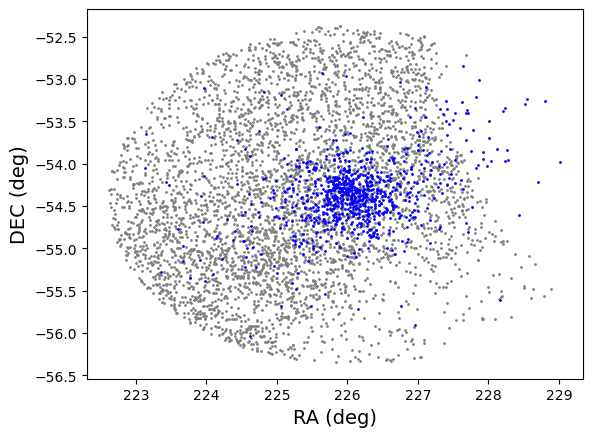

In [53]:
fig, ax = plt.subplots()

ax.scatter(p4_5p.RA_ICRS, p4_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4_5p.iloc[matched_idx_catalog1].RA_ICRS, p4_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [54]:
dfvg_t = len(dfvg)
p4_5p_t = len(p4_5p.iloc[matched_idx_catalog1])

Completeness


In [55]:
p4_5p_c = p4_5p_t /dfvg_t
p4_5p_c*100

0.0

Pureness

In [56]:
p4_5p_p = p4_5p_t/len(p4_5p)
p4_5p_p*100

0.0

### Population 5

In [57]:
ra1 = p5_5p.RA_ICRS
dec1 = p5_5p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [58]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [59]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [60]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [61]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [62]:
p5_5p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
38,226.964782,-55.900104,5880575114680639488,1.1518,-7.280,-5.884,31,1.395,NaN,1.017,16.938236,17.682375,16.052890,1.629484,NaN,-36.635825,226.964840,-55.900078,1.181979,4
191,225.478188,-55.681735,5881380781843703040,1.2525,-7.781,-5.683,31,1.584,NaN,0.916,12.982288,13.249472,12.548177,0.701295,-17.67,-36.717506,225.478249,-55.681710,1.284755,4
202,226.153399,-55.717696,5881387207115290368,1.1593,-7.530,-5.365,31,1.445,NaN,1.005,16.106497,16.707300,15.368125,1.339175,NaN,-36.619735,226.153458,-55.717672,1.191565,4
227,225.681373,-55.541256,5881404043388082560,1.2967,-7.110,-5.223,31,1.548,NaN,0.920,13.714863,14.057667,13.201783,0.855884,26.90,-36.545939,225.681429,-55.541233,1.337292,4
246,224.623523,-56.032550,5881458778464898944,1.1517,-7.719,-5.169,31,1.599,NaN,0.909,12.289694,12.524664,11.897099,0.627565,-27.72,-37.214618,224.623584,-56.032527,1.180923,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2108,224.746220,-53.610175,5899796708259124352,1.2995,-7.758,-5.572,31,1.526,NaN,0.930,14.170815,14.560180,13.609451,0.950728,4.13,-34.920681,224.746279,-53.610151,1.340445,4
2115,225.055878,-53.182328,5899835775283387136,1.1455,-7.159,-5.756,31,1.556,NaN,0.984,13.477468,13.800722,12.986613,0.814109,-56.52,-34.455467,225.055931,-53.182302,1.186468,4
2118,224.813303,-53.151743,5899845396010785920,1.2183,-7.914,-5.132,31,1.533,NaN,0.947,14.380452,14.750266,13.825043,0.925223,0.18,-34.476388,224.813362,-53.151720,1.259558,4
2123,225.981860,-52.964491,5899886765128211200,1.2670,-7.827,-5.348,31,1.574,NaN,0.978,13.357611,13.645534,12.906324,0.739209,-32.35,-34.062790,225.981918,-52.964467,1.308210,4


In [63]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
3810,NGC_5822,5880575114680639488,226.964782,-55.900104,1.1518,-7.280,-5.884,16.938236,17.682375,16.052890,0.77
1311,NGC_5822,5881380781843703040,225.478188,-55.681735,1.2525,-7.781,-5.683,12.982288,13.249472,12.548177,1.00
1284,NGC_5822,5881387207115290368,226.153399,-55.717696,1.1593,-7.530,-5.365,16.106497,16.707300,15.368125,1.00
2064,NGC_5822,5881404043388082560,225.681373,-55.541256,1.2967,-7.110,-5.223,13.714863,14.057667,13.201783,1.00
1537,NGC_5822,5881458778464898944,224.623523,-56.032550,1.1517,-7.719,-5.169,12.289694,12.524664,11.897099,0.97
...,...,...,...,...,...,...,...,...,...,...,...
1044,NGC_5822,5899796708259124352,224.746220,-53.610175,1.2995,-7.758,-5.572,14.170815,14.560180,13.609451,1.00
984,NGC_5822,5899835775283387136,225.055878,-53.182328,1.1455,-7.159,-5.756,13.477468,13.800722,12.986613,1.00
989,NGC_5822,5899845396010785920,224.813303,-53.151743,1.2183,-7.914,-5.132,14.380452,14.750266,13.825043,0.94
3759,NGC_5822,5899886765128211200,225.981860,-52.964491,1.2670,-7.827,-5.348,13.357611,13.645534,12.906324,1.00


Text(0, 0.5, 'DEC (deg)')

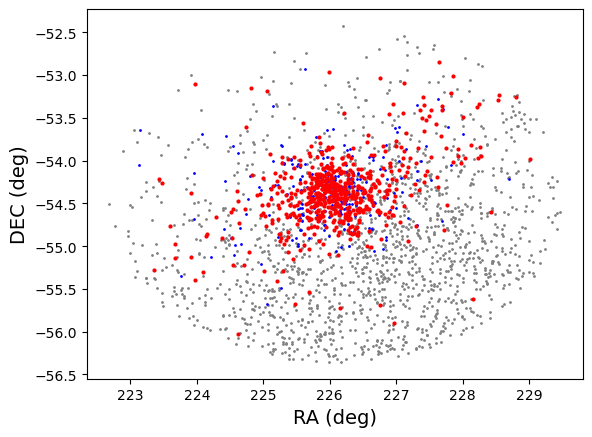

In [64]:
fig, ax = plt.subplots()

ax.scatter(p5_5p.RA_ICRS, p5_5p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p5_5p.iloc[matched_idx_catalog1].RA_ICRS, p5_5p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [65]:
dfvg_t = len(dfvg)
p5_5p_t = len(p5_5p.iloc[matched_idx_catalog1])

Completeness


In [66]:
p5_5p_c = p5_5p_t /dfvg_t
p5_5p_c*100

70.47058823529412

Pureness

In [67]:
p5_5p_p = p5_5p_t/len(p5_5p)
p5_5p_p*100

27.96451914098973

## Analyzing

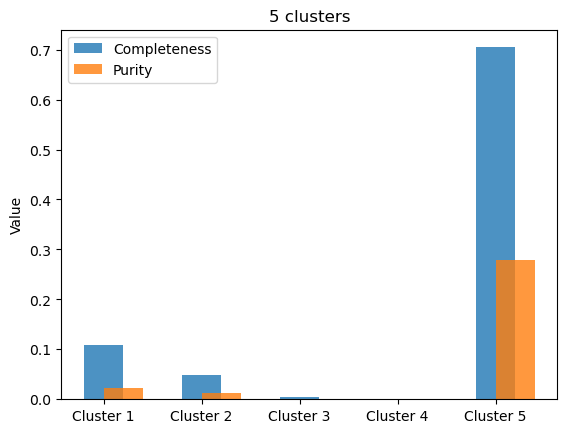

In [68]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4, 5]
completeness = [p1_5p_c, p2_5p_c, p3_5p_c, p4_5p_c, p5_5p_c]  # Exemplo de completude
purity = [p1_5p_p, p2_5p_p, p3_5p_p, p4_5p_p, p5_5p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("5 clusters")
plt.legend()
plt.show()

# 4 Populations

In [69]:
p1_4p = pd.read_csv('Catalogues/pop1_NGC5822_GMM1_4populations.csv')
p2_4p = pd.read_csv('Catalogues/pop2_NGC5822_GMM1_4populations.csv')
p3_4p = pd.read_csv('Catalogues/pop3_NGC5822_GMM1_4populations.csv')
p4_4p = pd.read_csv('Catalogues/pop4_NGC5822_GMM1_4populations.csv')

## Computing Completeness and Purity

### Population 1

In [70]:
ra1 = p1_4p.RA_ICRS
dec1 = p1_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [71]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [72]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [73]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [74]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [75]:
p1_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
1001,227.824025,-54.055434,5887584363901458816,1.3043,-7.391,-5.688,31,1.366,NaN,0.977,17.366590,18.257948,16.458431,1.799517,NaN,-34.732052,227.824081,-54.055409,1.334016,0
1562,227.316862,-53.352571,5887818181913082368,1.1910,-7.355,-5.490,31,1.411,NaN,0.977,16.765852,17.465560,15.929163,1.536398,NaN,-34.165156,227.316917,-53.352547,1.221729,0
1829,228.696431,-54.217853,5887895113373279360,1.2451,-7.077,-5.860,31,1.382,NaN,1.023,16.710571,17.538715,15.821643,1.717073,NaN,-34.721127,228.696484,-54.217827,1.276413,0
2447,228.002407,-53.692166,5887981974795794048,1.2053,-6.980,-5.525,31,1.430,NaN,1.019,16.540514,17.186708,15.748414,1.438294,NaN,-34.354299,228.002459,-53.692141,1.236588,0


In [76]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
1375,NGC_5822,5887584363901458816,227.824025,-54.055434,1.3043,-7.391,-5.688,17.366590,18.257948,16.458431,0.93
289,NGC_5822,5887818181913082368,227.316862,-53.352571,1.1910,-7.355,-5.490,16.765852,17.465560,15.929163,1.00
702,NGC_5822,5887895113373279360,228.696431,-54.217853,1.2451,-7.077,-5.860,16.710571,17.538715,15.821643,0.80
1265,NGC_5822,5887981974795794048,228.002407,-53.692166,1.2053,-6.980,-5.525,16.540514,17.186708,15.748414,0.93


Text(0, 0.5, 'DEC (deg)')

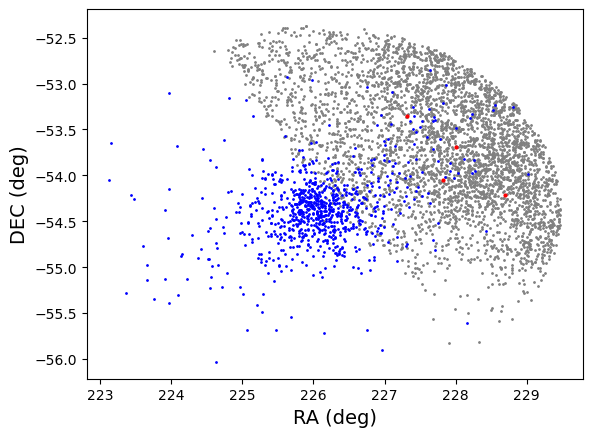

In [77]:
fig, ax = plt.subplots()

ax.scatter(p1_4p.RA_ICRS, p1_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_4p.iloc[matched_idx_catalog1].RA_ICRS, p1_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [78]:
dfvg_t = len(dfvg)
p1_4p_t = len(p1_4p.iloc[matched_idx_catalog1])

Completeness


In [79]:
p1_4p_c = p1_4p_t /dfvg_t
p1_4p_c*100

0.4705882352941176

Pureness

In [80]:
p1_4p_p = p1_4p_t/len(p1_4p)
p1_4p_p*100

0.10495932826029913

### Population 2

In [81]:
ra1 = p2_4p.RA_ICRS
dec1 = p2_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [82]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [83]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [84]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [85]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [86]:
p2_4p

,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
0,226.562522,-56.327802,5880538830781444224,1.1739,-5.756,-5.965,95,NaN,1.4393,1.074,20.220560,NaN,NaN,NaN,NaN,-37.114340,226.562568,-56.327776,1.175188,1
1,226.398085,-56.335706,5880539307516578816,1.2869,-6.523,-7.522,31,1.292,NaN,1.000,18.668010,19.842556,17.508350,2.334206,NaN,-37.153083,226.398137,-56.335672,1.311239,1
2,227.075838,-56.181640,5880555357832300160,1.1623,-6.862,-6.368,95,NaN,1.6931,1.080,20.615982,21.518698,19.561905,1.956793,NaN,-36.879746,227.075893,-56.181612,1.223802,1
3,227.209406,-56.228835,5880555495262372352,1.3403,-8.488,-5.746,95,NaN,1.2902,1.060,20.187069,21.393803,19.100082,2.293720,NaN,-36.899026,227.209474,-56.228809,1.306155,1
4,227.257952,-56.105183,5880557243306276352,1.3975,-8.281,-5.178,95,NaN,1.2620,1.203,20.700697,21.891203,19.411304,2.479899,NaN,-36.773506,227.258018,-56.105160,1.349424,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4114,226.518890,-52.425427,5900301212256261760,1.3144,-8.554,-4.704,95,NaN,1.2497,1.008,19.936178,20.657766,18.480429,2.177338,NaN,-33.446406,226.518953,-52.425406,1.278010,1
4115,226.429063,-52.427289,5900301693293744128,1.2397,-5.960,-6.230,95,NaN,1.4962,1.049,20.341524,21.055025,19.403385,1.651640,NaN,-33.466151,226.429106,-52.427262,1.253792,1
4116,226.362904,-52.402953,5900301933811458176,1.1699,-8.500,-5.627,95,NaN,1.4443,1.050,20.185804,20.745785,18.995424,1.750360,NaN,-33.456437,226.362966,-52.402928,1.172566,1
4117,226.571272,-52.390883,5900302685425379456,1.1524,-5.840,-6.054,95,NaN,1.2739,1.006,19.183874,20.276022,18.106766,2.169256,NaN,-33.403296,226.571315,-52.390856,1.167824,1


In [87]:
p2_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
490,224.961476,-55.213635,5881594602515882240,1.2689,-7.512,-5.034,31,1.361,NaN,1.162,17.349474,18.231016,16.355848,1.875168,NaN,-36.381012,224.961534,-55.213613,1.298703,1
562,225.550345,-54.816987,5881629301493616512,1.1493,-7.640,-6.049,31,1.340,NaN,1.158,17.376156,18.338808,16.360926,1.977882,NaN,-35.891907,225.550404,-54.816960,1.180023,1
563,225.568329,-54.811087,5881629340213941504,1.2995,-7.675,-5.432,31,1.378,NaN,1.018,17.205750,18.029667,16.288551,1.741116,NaN,-35.882804,225.568389,-54.811063,1.329280,1
664,224.574076,-54.990330,5881658168036516864,1.1791,-7.985,-5.555,31,1.403,NaN,1.095,16.926466,17.626638,16.007635,1.619003,NaN,-36.249552,224.574138,-54.990306,1.209249,1
681,224.517610,-54.909506,5881663734314222592,1.2572,-7.735,-5.469,31,1.399,NaN,0.995,17.059288,17.767277,16.132990,1.634287,NaN,-36.185276,224.517670,-54.909482,1.287015,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3236,225.411109,-53.996472,5899727056734045056,1.3037,-7.802,-5.409,31,1.370,NaN,1.007,17.514515,18.410551,16.575540,1.835011,NaN,-35.148840,225.411168,-53.996448,1.332758,1
3237,225.422426,-53.983871,5899727095425562624,1.2477,-7.714,-5.433,31,1.362,NaN,1.048,17.478111,18.408281,16.568153,1.840128,NaN,-35.134725,225.422485,-53.983847,1.277155,1
3243,225.140834,-54.001086,5899728950851484416,1.2710,-7.554,-5.575,31,1.369,NaN,1.009,17.246780,18.115307,16.344120,1.771187,NaN,-35.207581,225.140891,-54.001061,1.300963,1
3255,225.269970,-53.823054,5899732696063155968,1.2662,-7.634,-5.464,31,1.413,NaN,1.018,16.659767,17.361372,15.844638,1.516734,NaN,-35.014263,225.270028,-53.823030,1.297141,1


In [88]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
1017,NGC_5822,5881594602515882240,224.961476,-55.213635,1.2689,-7.512,-5.034,17.349474,18.231016,16.355848,0.81
1236,NGC_5822,5881629301493616512,225.550345,-54.816987,1.1493,-7.640,-6.049,17.376156,18.338808,16.360926,0.87
1227,NGC_5822,5881629340213941504,225.568329,-54.811087,1.2995,-7.675,-5.432,17.205750,18.029667,16.288551,1.00
416,NGC_5822,5881658168036516864,224.574076,-54.990330,1.1791,-7.985,-5.555,16.926466,17.626638,16.007635,0.92
10,NGC_5822,5881663734314222592,224.517610,-54.909506,1.2572,-7.735,-5.469,17.059288,17.767277,16.132990,0.99
...,...,...,...,...,...,...,...,...,...,...,...
475,NGC_5822,5899727056734045056,225.411109,-53.996472,1.3037,-7.802,-5.409,17.514515,18.410551,16.575540,0.91
484,NGC_5822,5899727095425562624,225.422426,-53.983871,1.2477,-7.714,-5.433,17.478111,18.408281,16.568153,1.00
187,NGC_5822,5899728950851484416,225.140834,-54.001086,1.2710,-7.554,-5.575,17.246780,18.115307,16.344120,1.00
504,NGC_5822,5899732696063155968,225.269970,-53.823054,1.2662,-7.634,-5.464,16.659767,17.361372,15.844638,1.00


Text(0, 0.5, 'DEC (deg)')

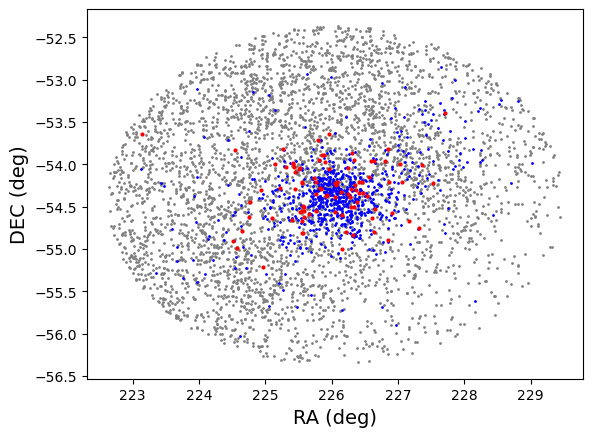

In [89]:
fig, ax = plt.subplots()

ax.scatter(p2_4p.RA_ICRS, p2_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_4p.iloc[matched_idx_catalog1].RA_ICRS, p2_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [90]:
dfvg_t = len(dfvg)
p2_4p_t = len(p2_4p.iloc[matched_idx_catalog1])

Completeness


In [91]:
p2_4p_c = p2_4p_t /dfvg_t
p2_4p_c*100

10.941176470588236

Pureness

In [92]:
p2_4p_p = p2_4p_t/len(p2_4p)
p2_4p_p*100

2.2578295702840494

### Population 3

In [93]:
ra1 = p3_4p.RA_ICRS
dec1 = p3_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [94]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [95]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [96]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [97]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [98]:
p3_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
366,223.760676,-55.344328,5881551377958880128,1.1152,-7.487,-5.748,31,1.437,NaN,1.032,16.466734,17.092070,15.677525,1.414545,NaN,-36.745401,223.760734,-55.344302,1.146472,2
388,225.060793,-55.680014,5881564091066262016,1.1093,-7.255,-5.000,31,1.432,NaN,0.996,16.137136,16.785877,15.373423,1.412455,NaN,-36.798122,225.060850,-55.679992,1.141437,2
414,225.270825,-55.485664,5881572848446940544,1.0986,-7.798,-5.539,31,1.357,NaN,1.092,17.944447,18.905075,16.980621,1.924454,NaN,-36.574527,225.270886,-55.485639,1.125751,2
534,225.516483,-54.972678,5881623735215581440,1.1047,-7.405,-5.551,95,NaN,1.3206,1.050,17.753492,18.541800,16.619453,1.922346,NaN,-36.044785,225.516540,-54.972653,1.143086,2
1197,226.994399,-54.557440,5887465238679318272,1.1098,-7.448,-5.701,31,1.319,NaN,0.953,18.369164,19.492678,17.354685,2.137993,NaN,-35.365304,226.994456,-54.557415,1.135509,2
1254,227.687838,-54.703526,5887492687767321216,1.1385,-7.065,-5.471,31,1.311,NaN,1.010,18.362644,19.490253,17.277908,2.212345,NaN,-35.370499,227.687892,-54.703502,1.164515,2
1379,227.086107,-54.363846,5887561445929174144,1.0945,-7.290,-5.671,31,1.341,NaN,1.010,18.055210,18.950380,16.965130,1.985251,NaN,-35.164994,227.086162,-54.363821,1.121503,2
1382,226.973779,-54.384177,5887564022934878464,1.1068,-7.859,-5.188,31,1.452,NaN,1.006,16.113703,16.690302,15.378590,1.311712,NaN,-35.205878,226.973839,-54.384154,1.139234,2
1409,227.309448,-54.126391,5887574777533795712,1.1054,-7.004,-5.325,31,1.370,NaN,1.056,17.195107,18.072567,16.273400,1.799168,NaN,-34.897771,227.309501,-54.126367,1.135524,2
1540,226.168965,-54.624885,5887628756679396736,1.1160,-7.645,-5.178,95,NaN,1.4134,1.051,16.808088,17.512194,15.804749,1.707444,NaN,-35.589400,226.169024,-54.624862,1.146914,2


In [99]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
1510,NGC_5822,5881551377958880128,223.760676,-55.344328,1.1152,-7.487,-5.748,16.466734,17.092070,15.677525,0.96
558,NGC_5822,5881564091066262016,225.060793,-55.680014,1.1093,-7.255,-5.000,16.137136,16.785877,15.373423,0.79
438,NGC_5822,5881572848446940544,225.270825,-55.485664,1.0986,-7.798,-5.539,17.944447,18.905075,16.980621,0.71
76,NGC_5822,5881623735215581440,225.516483,-54.972678,1.1047,-7.405,-5.551,17.753492,18.541800,16.619453,0.92
3271,NGC_5822,5887465238679318272,226.994399,-54.557440,1.1098,-7.448,-5.701,18.369164,19.492678,17.354685,0.83
1434,NGC_5822,5887492687767321216,227.687838,-54.703526,1.1385,-7.065,-5.471,18.362644,19.490253,17.277908,0.73
2358,NGC_5822,5887561445929174144,227.086107,-54.363846,1.0945,-7.290,-5.671,18.055210,18.950380,16.965130,0.83
2339,NGC_5822,5887564022934878464,226.973779,-54.384177,1.1068,-7.859,-5.188,16.113703,16.690302,15.378590,0.99
1887,NGC_5822,5887574777533795712,227.309448,-54.126391,1.1054,-7.004,-5.325,17.195107,18.072567,16.273400,0.79
1728,NGC_5822,5887628756679396736,226.168965,-54.624885,1.1160,-7.645,-5.178,16.808088,17.512194,15.804749,0.95


Text(0, 0.5, 'DEC (deg)')

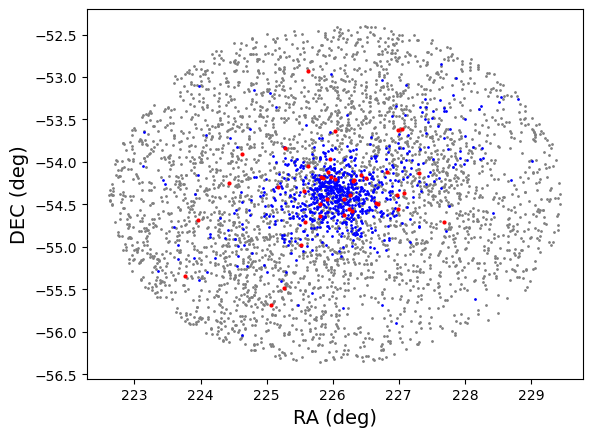

In [100]:
fig, ax = plt.subplots()

ax.scatter(p3_4p.RA_ICRS, p3_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_4p.iloc[matched_idx_catalog1].RA_ICRS, p3_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [101]:
dfvg_t = len(dfvg)
p3_4p_t = len(p3_4p.iloc[matched_idx_catalog1])

Completeness


In [102]:
p3_4p_c = p3_4p_t /dfvg_t
p3_4p_c*100

4.941176470588235

Pureness

In [103]:
p3_4p_p = p3_4p_t/len(p3_4p)
p3_4p_p*100

1.1653718091009988

### Population 4

In [104]:
ra1 = p4_4p.RA_ICRS
dec1 = p4_4p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [105]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [106]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [107]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [108]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [109]:
p4_4p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
57,226.964782,-55.900104,5880575114680639488,1.1518,-7.280,-5.884,31,1.395,NaN,1.017,16.938236,17.682375,16.052890,1.629484,NaN,-36.635825,226.964840,-55.900078,1.181979,3
343,225.478188,-55.681735,5881380781843703040,1.2525,-7.781,-5.683,31,1.584,NaN,0.916,12.982288,13.249472,12.548177,0.701295,-17.67,-36.717506,225.478249,-55.681710,1.284755,3
370,226.153399,-55.717696,5881387207115290368,1.1593,-7.530,-5.365,31,1.445,NaN,1.005,16.106497,16.707300,15.368125,1.339175,NaN,-36.619735,226.153458,-55.717672,1.191565,3
421,225.681373,-55.541256,5881404043388082560,1.2967,-7.110,-5.223,31,1.548,NaN,0.920,13.714863,14.057667,13.201783,0.855884,26.90,-36.545939,225.681429,-55.541233,1.337292,3
503,224.623523,-56.032550,5881458778464898944,1.1517,-7.719,-5.169,31,1.599,NaN,0.909,12.289694,12.524664,11.897099,0.627565,-27.72,-37.214618,224.623584,-56.032527,1.180923,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4858,224.746220,-53.610175,5899796708259124352,1.2995,-7.758,-5.572,31,1.526,NaN,0.930,14.170815,14.560180,13.609451,0.950728,4.13,-34.920681,224.746279,-53.610151,1.340445,3
4966,225.055878,-53.182328,5899835775283387136,1.1455,-7.159,-5.756,31,1.556,NaN,0.984,13.477468,13.800722,12.986613,0.814109,-56.52,-34.455467,225.055931,-53.182302,1.186468,3
4994,224.813303,-53.151743,5899845396010785920,1.2183,-7.914,-5.132,31,1.533,NaN,0.947,14.380452,14.750266,13.825043,0.925223,0.18,-34.476388,224.813362,-53.151720,1.259558,3
5015,225.981860,-52.964491,5899886765128211200,1.2670,-7.827,-5.348,31,1.574,NaN,0.978,13.357611,13.645534,12.906324,0.739209,-32.35,-34.062790,225.981918,-52.964467,1.308210,3


In [110]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
3810,NGC_5822,5880575114680639488,226.964782,-55.900104,1.1518,-7.280,-5.884,16.938236,17.682375,16.052890,0.77
1311,NGC_5822,5881380781843703040,225.478188,-55.681735,1.2525,-7.781,-5.683,12.982288,13.249472,12.548177,1.00
1284,NGC_5822,5881387207115290368,226.153399,-55.717696,1.1593,-7.530,-5.365,16.106497,16.707300,15.368125,1.00
2064,NGC_5822,5881404043388082560,225.681373,-55.541256,1.2967,-7.110,-5.223,13.714863,14.057667,13.201783,1.00
1537,NGC_5822,5881458778464898944,224.623523,-56.032550,1.1517,-7.719,-5.169,12.289694,12.524664,11.897099,0.97
...,...,...,...,...,...,...,...,...,...,...,...
1044,NGC_5822,5899796708259124352,224.746220,-53.610175,1.2995,-7.758,-5.572,14.170815,14.560180,13.609451,1.00
984,NGC_5822,5899835775283387136,225.055878,-53.182328,1.1455,-7.159,-5.756,13.477468,13.800722,12.986613,1.00
989,NGC_5822,5899845396010785920,224.813303,-53.151743,1.2183,-7.914,-5.132,14.380452,14.750266,13.825043,0.94
3759,NGC_5822,5899886765128211200,225.981860,-52.964491,1.2670,-7.827,-5.348,13.357611,13.645534,12.906324,1.00


Text(0, 0.5, 'DEC (deg)')

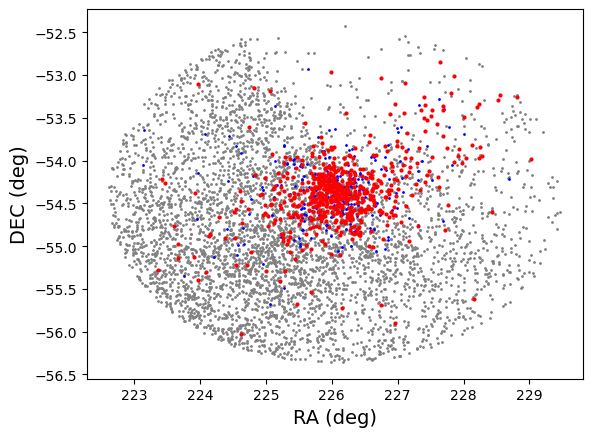

In [111]:
fig, ax = plt.subplots()

ax.scatter(p4_4p.RA_ICRS, p4_4p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p4_4p.iloc[matched_idx_catalog1].RA_ICRS, p4_4p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [112]:
dfvg_t = len(dfvg)
p4_4p_t = len(p4_4p.iloc[matched_idx_catalog1])

Completeness


In [113]:
p4_4p_c = p4_4p_t /dfvg_t
p4_4p_c*100

70.47058823529412

Pureness

In [114]:
p4_4p_p = p4_4p_t/len(p4_4p)
p4_4p_p*100

11.550327805630543

## Analyzing

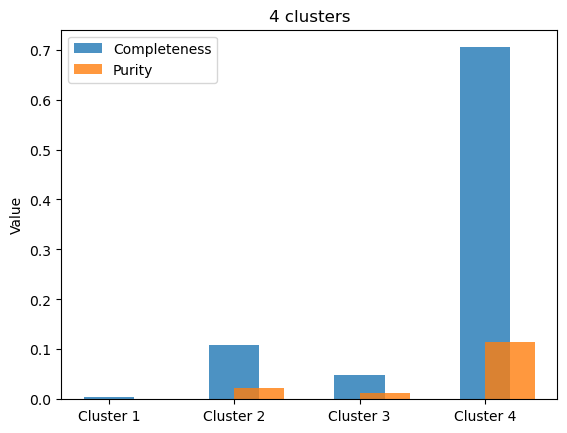

In [115]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3, 4]
completeness = [p1_4p_c, p2_4p_c, p3_4p_c, p4_4p_c]  # Exemplo de completude
purity = [p1_4p_p, p2_4p_p, p3_4p_p, p4_4p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("4 clusters")
plt.legend()
plt.show()

# 3 Populations

In [116]:
p1_3p = pd.read_csv('Catalogues/pop1_NGC5822_GMM1_3populations.csv')
p2_3p = pd.read_csv('Catalogues/pop2_NGC5822_GMM1_3populations.csv')
p3_3p = pd.read_csv('Catalogues/pop3_NGC5822_GMM1_3populations.csv')

## Computing Completeness and Purity

### Population 1

In [117]:
ra1 = p1_3p.RA_ICRS
dec1 = p1_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [118]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [119]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [120]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [121]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [122]:
p1_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
1002,224.094871,-55.298356,5881555187537860736,1.2187,-7.874,-5.286,31,1.446,NaN,0.940,16.117235,16.722237,15.379248,1.342989,NaN,-36.634530,224.094932,-55.298333,1.250939,0
1043,225.060793,-55.680014,5881564091066262016,1.1093,-7.255,-5.000,31,1.432,NaN,0.996,16.137136,16.785877,15.373423,1.412455,NaN,-36.798122,225.060850,-55.679992,1.141437,0
1276,225.296328,-55.295683,5881601474464060928,1.2164,-7.437,-5.602,31,1.410,NaN,1.036,15.994070,16.715670,15.174198,1.541472,NaN,-36.391385,225.296386,-55.295658,1.253359,0
1788,225.037382,-54.762253,5881674420193864448,1.2681,-7.452,-5.363,31,1.451,NaN,0.952,16.002890,16.585930,15.278373,1.307557,NaN,-35.942736,225.037439,-54.762229,1.304746,0
1932,224.947892,-54.393671,5881700911554151552,1.2114,-7.603,-5.352,31,1.441,NaN,0.983,15.914717,16.527950,15.156510,1.371440,NaN,-35.615007,224.947950,-54.393647,1.251908,0
2748,227.049836,-54.721284,5887450223472667904,1.2254,-7.183,-5.557,31,1.409,NaN,0.994,16.660004,17.377148,15.846276,1.530871,NaN,-35.509129,227.049892,-54.721259,1.256323,0
2776,226.844094,-54.750957,5887456545664899456,1.2334,-7.311,-5.582,31,1.412,NaN,0.979,16.709253,17.409754,15.893557,1.516197,NaN,-35.576743,226.844150,-54.750932,1.264154,0
2799,226.870255,-54.662403,5887462936577443584,1.2052,-7.327,-5.570,95,NaN,1.2429,0.963,18.433466,19.786041,17.296278,2.489763,NaN,-35.488230,226.870311,-54.662378,1.246681,0
2876,227.714655,-54.810669,5887489664120420096,1.2644,-7.351,-5.214,95,NaN,1.2850,0.995,18.472645,19.825780,17.392952,2.432829,NaN,-35.466613,227.714712,-54.810646,1.298379,0
2889,227.687838,-54.703526,5887492687767321216,1.1385,-7.065,-5.471,31,1.311,NaN,1.010,18.362644,19.490253,17.277908,2.212345,NaN,-35.370499,227.687892,-54.703502,1.164515,0


In [123]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
589,NGC_5822,5881555187537860736,224.094871,-55.298356,1.2187,-7.874,-5.286,16.117235,16.722237,15.379248,0.98
558,NGC_5822,5881564091066262016,225.060793,-55.680014,1.1093,-7.255,-5.000,16.137136,16.785877,15.373423,0.79
553,NGC_5822,5881601474464060928,225.296328,-55.295683,1.2164,-7.437,-5.602,15.994070,16.715670,15.174198,1.00
567,NGC_5822,5881674420193864448,225.037382,-54.762253,1.2681,-7.452,-5.363,16.002890,16.585930,15.278373,1.00
86,NGC_5822,5881700911554151552,224.947892,-54.393671,1.2114,-7.603,-5.352,15.914717,16.527950,15.156510,1.00
3452,NGC_5822,5887450223472667904,227.049836,-54.721284,1.2254,-7.183,-5.557,16.660004,17.377148,15.846276,1.00
3382,NGC_5822,5887456545664899456,226.844094,-54.750957,1.2334,-7.311,-5.582,16.709253,17.409754,15.893557,1.00
3235,NGC_5822,5887462936577443584,226.870255,-54.662403,1.2052,-7.327,-5.570,18.433466,19.786041,17.296278,0.93
2035,NGC_5822,5887489664120420096,227.714655,-54.810669,1.2644,-7.351,-5.214,18.472645,19.825780,17.392952,0.80
1434,NGC_5822,5887492687767321216,227.687838,-54.703526,1.1385,-7.065,-5.471,18.362644,19.490253,17.277908,0.73


Text(0, 0.5, 'DEC (deg)')

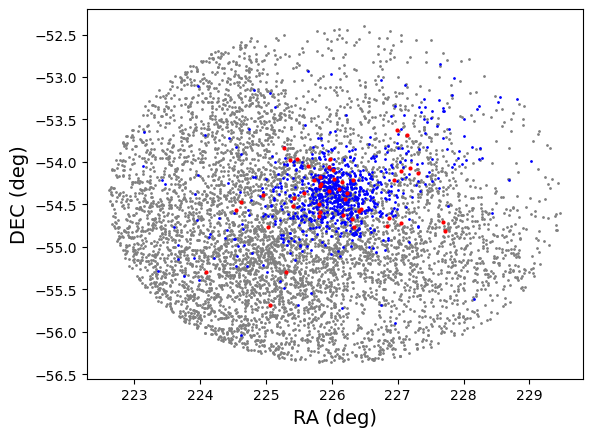

In [124]:
fig, ax = plt.subplots()

ax.scatter(p1_3p.RA_ICRS, p1_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_3p.iloc[matched_idx_catalog1].RA_ICRS, p1_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [125]:
dfvg_t = len(dfvg)
p1_3p_t = len(p1_3p.iloc[matched_idx_catalog1])

Completeness


In [126]:
p1_3p_c = p1_3p_t /dfvg_t
p1_3p_c*100

5.529411764705882

Pureness

In [127]:
p1_3p_p = p1_3p_t/len(p1_3p)
p1_3p_p*100

0.7726450764425448

### Population 2

In [128]:
ra1 = p2_3p.RA_ICRS
dec1 = p2_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [129]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [130]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [131]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [132]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [133]:
p2_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
1001,227.824025,-54.055434,5887584363901458816,1.3043,-7.391,-5.688,31,1.366,NaN,0.977,17.366590,18.257948,16.458431,1.799517,NaN,-34.732052,227.824081,-54.055409,1.334016,1
1562,227.316862,-53.352571,5887818181913082368,1.1910,-7.355,-5.490,31,1.411,NaN,0.977,16.765852,17.465560,15.929163,1.536398,NaN,-34.165156,227.316917,-53.352547,1.221729,1
1829,228.696431,-54.217853,5887895113373279360,1.2451,-7.077,-5.860,31,1.382,NaN,1.023,16.710571,17.538715,15.821643,1.717073,NaN,-34.721127,228.696484,-54.217827,1.276413,1
2447,228.002407,-53.692166,5887981974795794048,1.2053,-6.980,-5.525,31,1.430,NaN,1.019,16.540514,17.186708,15.748414,1.438294,NaN,-34.354299,228.002459,-53.692141,1.236588,1


In [134]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
1375,NGC_5822,5887584363901458816,227.824025,-54.055434,1.3043,-7.391,-5.688,17.366590,18.257948,16.458431,0.93
289,NGC_5822,5887818181913082368,227.316862,-53.352571,1.1910,-7.355,-5.490,16.765852,17.465560,15.929163,1.00
702,NGC_5822,5887895113373279360,228.696431,-54.217853,1.2451,-7.077,-5.860,16.710571,17.538715,15.821643,0.80
1265,NGC_5822,5887981974795794048,228.002407,-53.692166,1.2053,-6.980,-5.525,16.540514,17.186708,15.748414,0.93


Text(0, 0.5, 'DEC (deg)')

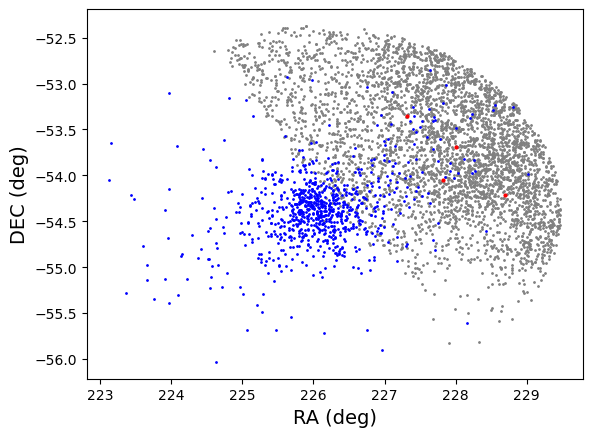

In [135]:
fig, ax = plt.subplots()

ax.scatter(p2_3p.RA_ICRS, p2_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_3p.iloc[matched_idx_catalog1].RA_ICRS, p2_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [136]:
dfvg_t = len(dfvg)
p2_3p_t = len(p2_3p.iloc[matched_idx_catalog1])

Completeness


In [137]:
p2_3p_c = p2_3p_t /dfvg_t
p2_3p_c*100

0.4705882352941176

Pureness

In [138]:
p2_3p_p = p2_3p_t/len(p2_3p)
p2_3p_p*100

0.10495932826029913

### Population 3

In [139]:
ra1 = p3_3p.RA_ICRS
dec1 = p3_3p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [140]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [141]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [142]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [143]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [144]:
p3_3p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
28,226.964782,-55.900104,5880575114680639488,1.1518,-7.280,-5.884,31,1.395,NaN,1.017,16.938236,17.682375,16.052890,1.629484,NaN,-36.635825,226.964840,-55.900078,1.181979,2
215,225.478188,-55.681735,5881380781843703040,1.2525,-7.781,-5.683,31,1.584,NaN,0.916,12.982288,13.249472,12.548177,0.701295,-17.67,-36.717506,225.478249,-55.681710,1.284755,2
232,226.153399,-55.717696,5881387207115290368,1.1593,-7.530,-5.365,31,1.445,NaN,1.005,16.106497,16.707300,15.368125,1.339175,NaN,-36.619735,226.153458,-55.717672,1.191565,2
268,225.681373,-55.541256,5881404043388082560,1.2967,-7.110,-5.223,31,1.548,NaN,0.920,13.714863,14.057667,13.201783,0.855884,26.90,-36.545939,225.681429,-55.541233,1.337292,2
318,224.623523,-56.032550,5881458778464898944,1.1517,-7.719,-5.169,31,1.599,NaN,0.909,12.289694,12.524664,11.897099,0.627565,-27.72,-37.214618,224.623584,-56.032527,1.180923,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,225.055878,-53.182328,5899835775283387136,1.1455,-7.159,-5.756,31,1.556,NaN,0.984,13.477468,13.800722,12.986613,0.814109,-56.52,-34.455467,225.055931,-53.182302,1.186468,2
6014,224.813303,-53.151743,5899845396010785920,1.2183,-7.914,-5.132,31,1.533,NaN,0.947,14.380452,14.750266,13.825043,0.925223,0.18,-34.476388,224.813362,-53.151720,1.259558,2
6178,225.981860,-52.964491,5899886765128211200,1.2670,-7.827,-5.348,31,1.574,NaN,0.978,13.357611,13.645534,12.906324,0.739209,-32.35,-34.062790,225.981918,-52.964467,1.308210,2
6350,225.632336,-52.932389,5899936513703143680,1.1019,-7.897,-5.463,31,1.390,NaN,1.041,17.262901,18.045506,16.357264,1.688242,NaN,-34.103047,225.632394,-52.932365,1.131408,2


In [145]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
3810,NGC_5822,5880575114680639488,226.964782,-55.900104,1.1518,-7.280,-5.884,16.938236,17.682375,16.052890,0.77
1311,NGC_5822,5881380781843703040,225.478188,-55.681735,1.2525,-7.781,-5.683,12.982288,13.249472,12.548177,1.00
1284,NGC_5822,5881387207115290368,226.153399,-55.717696,1.1593,-7.530,-5.365,16.106497,16.707300,15.368125,1.00
2064,NGC_5822,5881404043388082560,225.681373,-55.541256,1.2967,-7.110,-5.223,13.714863,14.057667,13.201783,1.00
1537,NGC_5822,5881458778464898944,224.623523,-56.032550,1.1517,-7.719,-5.169,12.289694,12.524664,11.897099,0.97
...,...,...,...,...,...,...,...,...,...,...,...
984,NGC_5822,5899835775283387136,225.055878,-53.182328,1.1455,-7.159,-5.756,13.477468,13.800722,12.986613,1.00
989,NGC_5822,5899845396010785920,224.813303,-53.151743,1.2183,-7.914,-5.132,14.380452,14.750266,13.825043,0.94
3759,NGC_5822,5899886765128211200,225.981860,-52.964491,1.2670,-7.827,-5.348,13.357611,13.645534,12.906324,1.00
3738,NGC_5822,5899936513703143680,225.632336,-52.932389,1.1019,-7.897,-5.463,17.262901,18.045506,16.357264,0.85


Text(0, 0.5, 'DEC (deg)')

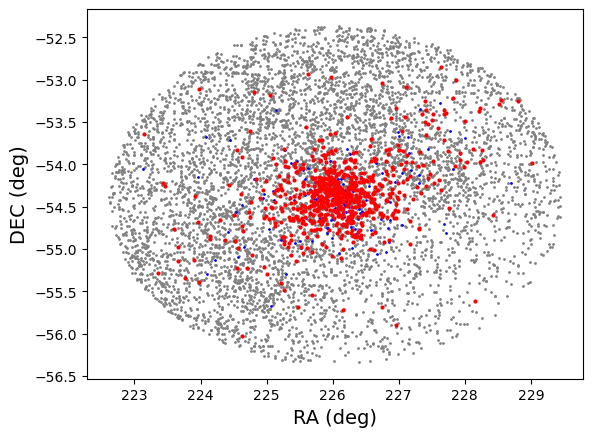

In [146]:
fig, ax = plt.subplots()

ax.scatter(p3_3p.RA_ICRS, p3_3p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p3_3p.iloc[matched_idx_catalog1].RA_ICRS, p3_3p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [147]:
dfvg_t = len(dfvg)
p3_3p_t = len(p3_3p.iloc[matched_idx_catalog1])

Completeness


In [148]:
p3_3p_c = p3_3p_t /dfvg_t
p3_3p_c*100

80.82352941176471

Pureness

In [149]:
p3_3p_p = p3_3p_t/len(p3_3p)
p3_3p_p*100

10.064459419865221

## Analyzing

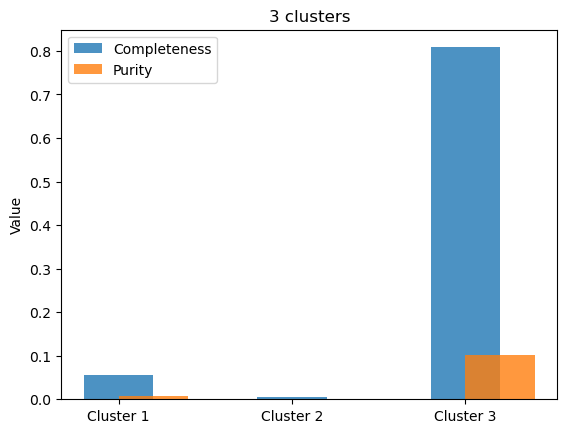

In [150]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2, 3]
completeness = [p1_3p_c, p2_3p_c, p3_3p_c]  # Exemplo de completude
purity = [p1_3p_p, p2_3p_p, p3_3p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("3 clusters")
plt.legend()
plt.show()

# 2 Populations

In [151]:
p1_2p = pd.read_csv('Catalogues/pop1_NGC5822_GMM1_2populations.csv')
p2_2p = pd.read_csv('Catalogues/pop2_NGC5822_GMM1_2populations.csv')

## Computing Completeness and Purity

### Population 1

In [152]:
ra1 = p1_2p.RA_ICRS
dec1 = p1_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [153]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [154]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [155]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [156]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [157]:
p1_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
1002,224.094871,-55.298356,5881555187537860736,1.2187,-7.874,-5.286,31,1.446,NaN,0.940,16.117235,16.722237,15.379248,1.342989,NaN,-36.634530,224.094932,-55.298333,1.250939,0
1043,225.060793,-55.680014,5881564091066262016,1.1093,-7.255,-5.000,31,1.432,NaN,0.996,16.137136,16.785877,15.373423,1.412455,NaN,-36.798122,225.060850,-55.679992,1.141437,0
1276,225.296328,-55.295683,5881601474464060928,1.2164,-7.437,-5.602,31,1.410,NaN,1.036,15.994070,16.715670,15.174198,1.541472,NaN,-36.391385,225.296386,-55.295658,1.253359,0
1788,225.037382,-54.762253,5881674420193864448,1.2681,-7.452,-5.363,31,1.451,NaN,0.952,16.002890,16.585930,15.278373,1.307557,NaN,-35.942736,225.037439,-54.762229,1.304746,0
1932,224.947892,-54.393671,5881700911554151552,1.2114,-7.603,-5.352,31,1.441,NaN,0.983,15.914717,16.527950,15.156510,1.371440,NaN,-35.615007,224.947950,-54.393647,1.251908,0
3284,227.049836,-54.721284,5887450223472667904,1.2254,-7.183,-5.557,31,1.409,NaN,0.994,16.660004,17.377148,15.846276,1.530871,NaN,-35.509129,227.049892,-54.721259,1.256323,0
3321,226.844094,-54.750957,5887456545664899456,1.2334,-7.311,-5.582,31,1.412,NaN,0.979,16.709253,17.409754,15.893557,1.516197,NaN,-35.576743,226.844150,-54.750932,1.264154,0
3347,226.870255,-54.662403,5887462936577443584,1.2052,-7.327,-5.570,95,NaN,1.2429,0.963,18.433466,19.786041,17.296278,2.489763,NaN,-35.488230,226.870311,-54.662378,1.246681,0
3471,227.714655,-54.810669,5887489664120420096,1.2644,-7.351,-5.214,95,NaN,1.2850,0.995,18.472645,19.825780,17.392952,2.432829,NaN,-35.466613,227.714712,-54.810646,1.298379,0
3487,227.687838,-54.703526,5887492687767321216,1.1385,-7.065,-5.471,31,1.311,NaN,1.010,18.362644,19.490253,17.277908,2.212345,NaN,-35.370499,227.687892,-54.703502,1.164515,0


In [158]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
589,NGC_5822,5881555187537860736,224.094871,-55.298356,1.2187,-7.874,-5.286,16.117235,16.722237,15.379248,0.98
558,NGC_5822,5881564091066262016,225.060793,-55.680014,1.1093,-7.255,-5.000,16.137136,16.785877,15.373423,0.79
553,NGC_5822,5881601474464060928,225.296328,-55.295683,1.2164,-7.437,-5.602,15.994070,16.715670,15.174198,1.00
567,NGC_5822,5881674420193864448,225.037382,-54.762253,1.2681,-7.452,-5.363,16.002890,16.585930,15.278373,1.00
86,NGC_5822,5881700911554151552,224.947892,-54.393671,1.2114,-7.603,-5.352,15.914717,16.527950,15.156510,1.00
3452,NGC_5822,5887450223472667904,227.049836,-54.721284,1.2254,-7.183,-5.557,16.660004,17.377148,15.846276,1.00
3382,NGC_5822,5887456545664899456,226.844094,-54.750957,1.2334,-7.311,-5.582,16.709253,17.409754,15.893557,1.00
3235,NGC_5822,5887462936577443584,226.870255,-54.662403,1.2052,-7.327,-5.570,18.433466,19.786041,17.296278,0.93
2035,NGC_5822,5887489664120420096,227.714655,-54.810669,1.2644,-7.351,-5.214,18.472645,19.825780,17.392952,0.80
1434,NGC_5822,5887492687767321216,227.687838,-54.703526,1.1385,-7.065,-5.471,18.362644,19.490253,17.277908,0.73


Text(0, 0.5, 'DEC (deg)')

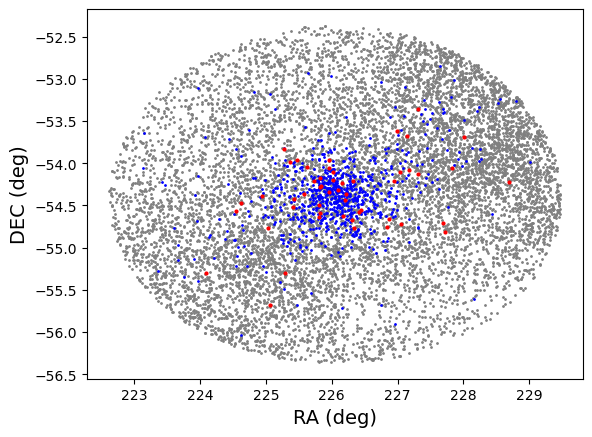

In [159]:
fig, ax = plt.subplots()

ax.scatter(p1_2p.RA_ICRS, p1_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p1_2p.iloc[matched_idx_catalog1].RA_ICRS, p1_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [160]:
dfvg_t = len(dfvg)
p1_2p_t = len(p1_2p.iloc[matched_idx_catalog1])

Completeness


In [161]:
p1_2p_c = p1_2p_t /dfvg_t
p1_2p_c*100

6.0

Pureness

In [162]:
p1_2p_p = p1_2p_t/len(p1_2p)
p1_2p_p*100

0.5154639175257731

### Population 2

In [163]:
ra1 = p2_2p.RA_ICRS
dec1 = p2_2p.DE_ICRS

ra2 = dfvg.RA_ICRS
dec2 = dfvg.DE_ICRS

In [164]:
#Catalogue from my work with GMM
catalog1 = SkyCoord(ra=ra1, dec=dec1, unit='degree')
#Catalogue from vG+2023
catalog2 = SkyCoord(ra=ra2, dec=dec2, unit='degree')

In [165]:
idx, d2d, d3d = catalog1.match_to_catalog_sky(catalog2)

In [166]:
max_sep = 1.0 * u.arcsec  # Exemplo de separacao limite de 1 segundo de arco
matches = d2d < max_sep

# Selecionar apenas correspondências válidas
matched_idx = idx[matches]
matched_d2d = d2d[matches]

In [167]:
matched_idx_catalog1 = np.where(matches)[0]
matched_idx_catalog2 = idx[matches]

In [168]:
p2_2p.iloc[matched_idx_catalog1]


,RA_ICRS,DE_ICRS,Source,Plx,pmRA,pmDE,Solved,nueff,pscol,RUWE,Gmag,BPmag,RPmag,BP-RP,RV,ELAT,RAJ2000,DEJ2000,Plx_corr,cluster
28,226.964782,-55.900104,5880575114680639488,1.1518,-7.280,-5.884,31,1.395,NaN,1.017,16.938236,17.682375,16.052890,1.629484,NaN,-36.635825,226.964840,-55.900078,1.181979,1
215,225.478188,-55.681735,5881380781843703040,1.2525,-7.781,-5.683,31,1.584,NaN,0.916,12.982288,13.249472,12.548177,0.701295,-17.67,-36.717506,225.478249,-55.681710,1.284755,1
232,226.153399,-55.717696,5881387207115290368,1.1593,-7.530,-5.365,31,1.445,NaN,1.005,16.106497,16.707300,15.368125,1.339175,NaN,-36.619735,226.153458,-55.717672,1.191565,1
268,225.681373,-55.541256,5881404043388082560,1.2967,-7.110,-5.223,31,1.548,NaN,0.920,13.714863,14.057667,13.201783,0.855884,26.90,-36.545939,225.681429,-55.541233,1.337292,1
318,224.623523,-56.032550,5881458778464898944,1.1517,-7.719,-5.169,31,1.599,NaN,0.909,12.289694,12.524664,11.897099,0.627565,-27.72,-37.214618,224.623584,-56.032527,1.180923,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5968,225.055878,-53.182328,5899835775283387136,1.1455,-7.159,-5.756,31,1.556,NaN,0.984,13.477468,13.800722,12.986613,0.814109,-56.52,-34.455467,225.055931,-53.182302,1.186468,1
6014,224.813303,-53.151743,5899845396010785920,1.2183,-7.914,-5.132,31,1.533,NaN,0.947,14.380452,14.750266,13.825043,0.925223,0.18,-34.476388,224.813362,-53.151720,1.259558,1
6178,225.981860,-52.964491,5899886765128211200,1.2670,-7.827,-5.348,31,1.574,NaN,0.978,13.357611,13.645534,12.906324,0.739209,-32.35,-34.062790,225.981918,-52.964467,1.308210,1
6350,225.632336,-52.932389,5899936513703143680,1.1019,-7.897,-5.463,31,1.390,NaN,1.041,17.262901,18.045506,16.357264,1.688242,NaN,-34.103047,225.632394,-52.932365,1.131408,1


In [169]:
dfvg.iloc[matched_idx_catalog2]

,Cluster,GaiaDR3,RA_ICRS,DE_ICRS,Plx,pmRA,pmDE,Gmag,BPmag,RPmag,Pmemb
3810,NGC_5822,5880575114680639488,226.964782,-55.900104,1.1518,-7.280,-5.884,16.938236,17.682375,16.052890,0.77
1311,NGC_5822,5881380781843703040,225.478188,-55.681735,1.2525,-7.781,-5.683,12.982288,13.249472,12.548177,1.00
1284,NGC_5822,5881387207115290368,226.153399,-55.717696,1.1593,-7.530,-5.365,16.106497,16.707300,15.368125,1.00
2064,NGC_5822,5881404043388082560,225.681373,-55.541256,1.2967,-7.110,-5.223,13.714863,14.057667,13.201783,1.00
1537,NGC_5822,5881458778464898944,224.623523,-56.032550,1.1517,-7.719,-5.169,12.289694,12.524664,11.897099,0.97
...,...,...,...,...,...,...,...,...,...,...,...
984,NGC_5822,5899835775283387136,225.055878,-53.182328,1.1455,-7.159,-5.756,13.477468,13.800722,12.986613,1.00
989,NGC_5822,5899845396010785920,224.813303,-53.151743,1.2183,-7.914,-5.132,14.380452,14.750266,13.825043,0.94
3759,NGC_5822,5899886765128211200,225.981860,-52.964491,1.2670,-7.827,-5.348,13.357611,13.645534,12.906324,1.00
3738,NGC_5822,5899936513703143680,225.632336,-52.932389,1.1019,-7.897,-5.463,17.262901,18.045506,16.357264,0.85


Text(0, 0.5, 'DEC (deg)')

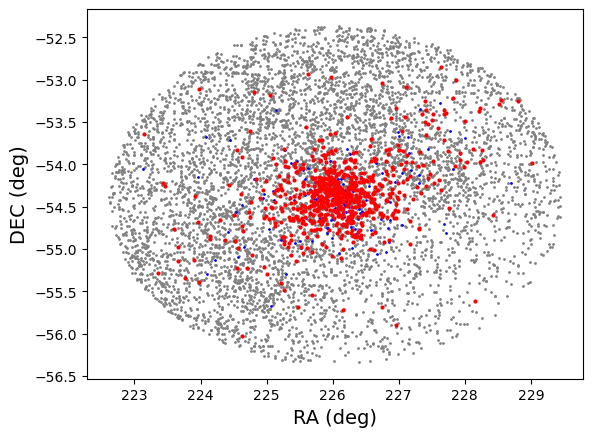

In [170]:
fig, ax = plt.subplots()

ax.scatter(p2_2p.RA_ICRS, p2_2p.DE_ICRS, s=1, c='grey')
ax.scatter(dfvg.RA_ICRS, dfvg.DE_ICRS, s=1, c='b')
ax.scatter(p2_2p.iloc[matched_idx_catalog1].RA_ICRS, p2_2p.iloc[matched_idx_catalog1].DE_ICRS, s=4, c='r')
ax.set_xlabel('RA (deg)', fontsize=14)
ax.set_ylabel('DEC (deg)', fontsize=14)
# ax.set_ylim(-11.5,-14.2)
# ax.set_xlim(121.2,124.5)

In [171]:
dfvg_t = len(dfvg)
p2_2p_t = len(p2_2p.iloc[matched_idx_catalog1])

Completeness


In [172]:
p2_2p_c = p2_2p_t /dfvg_t
p2_2p_c*100

80.82352941176471

Pureness

In [173]:
p2_2p_p = p2_2p_t/len(p2_2p)
p2_2p_p*100

10.064459419865221

## Analyzing

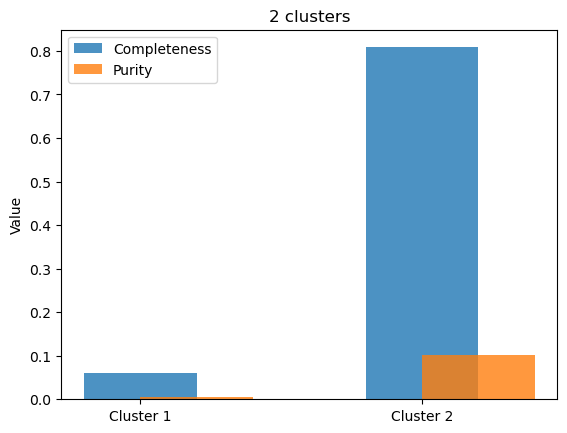

In [174]:
import seaborn as sns

# Dados simulados: completude e pureza por cluster
clusters = [1, 2]
completeness = [p1_2p_c, p2_2p_c]  # Exemplo de completude
purity = [p1_2p_p, p2_2p_p]  # Exemplo de pureza

# Bar plot
x = range(len(clusters))
plt.bar(x, completeness, width=0.4, label="Completeness", alpha=0.8, align='center')
plt.bar(x, purity, width=0.4, label="Purity", alpha=0.8, align='edge')

plt.xticks(x, [f"Cluster {c}" for c in clusters])
plt.ylabel("Value")
plt.title("2 clusters")
plt.legend()
plt.show()